# Path Optimisation

The functions within this interactive notebook aim to determine the distance between cartesian coordinates, optimise and determine the best, closest or total path distance. 

<hr/>

In [6]:
import math


The parameters for the function were created using the Pythagorean theorem formula for 2-dimensional distance [d=sqrt(x2-x1)^2+(y2-y1)^2]. I used indices [0] and [1] within the list as the variables p1 and p2 were two separate coordinates (I needed to use two different positions e.g. (1,2) and (2,3) as I could not derive a distance otherwise. By implementing indices I was able to replicate the x and y variables as in the formula. Originally I attempted to use the Python math module, math.dist() to solve for the points however it did not return the exact decimal values and also gave a boolean expression of False for the == test. 
</div>

In [7]:
# This function takes two points p1 and p2 and computes the distance between those two points.
#   each point is represented by a tuple containing the x and y coordinate of the point
#   for example (1,2) represents the point with an x coordinate of 1 and a y coordinate of 2

def distance(p1, p2) :
    distance = math.sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )
    return distance

In [8]:
# A test case for the distance function
distance((2.8, 9.8), (0.3, 8.3))
# should return 2.9154759474226504

2.9154759474226504

In [9]:
distance((2.8, 9.8), (0.3, 8.3)) == 2.9154759474226504
# should return True

True

The find_closest function required the closest point (the lowest distance value) in comparison to the list. I used a for loop, with the previous parameters current_shortest_path = float("inf") as an infinitely large value, ("inf"), to compare to (infinite interger). The variable i in the for loop would be the value which is updated in the loop (the list of remaining_points), so the parameter for i in range (len(remaining_points)): was used so that the values from null to the length of the list (remaining_points) would be calculated by the following parameters. To find the closest point in the list, logically, each value in the list would need to have a distance. The distance_of_this_point is calculated by the distance between the starting coordinates (start_point) and the remaining coordinates (remaining_points[i]). As I needed each remaining point to be calculated I let the for loop cycle through by giving the remaining_points the index of [i]. So the function now has a for loop which has the distance of each point till null (current_shortest_index = None). I then used an if statement as I needed each point to be compared to the current_shortest_path. So if the distance_of_this_point is less than infinity than the current_shortest_path is equal to the distance_of_this_point. This sorts the values to determine the newest shortest path. The current_shortest_index = i selects the coordinates from the remaining_points with the return statement remaining_points[current_shortest_index]. If the current_shortest_index is = to other than "i" then it chooses the index position in the list. e.g. current_shortest_index = 2, would cause the function to return the second value in the list.
I attempted to import numpy as np and use np.disarray with the variables from the distance function, p1 and p2 then using current_shortest_index = distance(p1, p2).argmin() to solve for the function however it gave SyntaxErrors and NameErrors as I did not assign the variables.
</div>

In [10]:
# This function takes a start point and a list of remaining points, and returns the remaining point that is closest to the start point
# the list of remaining points must contain at least one point

def find_closest(start_point, remaining_points):
    current_shortest_path = float("inf")
    current_shortest_index = None
    for i in range (len(remaining_points)):
        distance_of_this_point = math.dist(start_point, remaining_points[i])
        if (distance_of_this_point < current_shortest_path):
            current_shortest_path = distance_of_this_point
            current_shortest_index = i
            
    return remaining_points[current_shortest_index]



In [11]:
# A test case for the find_closest function
find_closest((2.8, 9.8), [(0.3, 8.3), (4.4, 8.8), (6.8, 7.4), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (5.0, 8.2), (7.7, 1.8), (3.4, 6.9), (4.8, 3.2), (0.7, 7.9)])
# should return (4.4, 8.8)

(4.4, 8.8)

In [12]:
find_closest((2.8, 9.8), [(0.3, 8.3), (4.4, 8.8), (6.8, 7.4), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (5.0, 8.2), (7.7, 1.8), (3.4, 6.9), (4.8, 3.2), (0.7, 7.9)]) == (4.4, 8.8)
# should return True

True


I use total_distance = 0 as I want the function to start with total distance being 0 so as the for loop runs, it will calculate the final total distance. In the for loop I use -1 to prevent the loop from trying to calculate a point which should not be calculated. For example, without the -1 the function could either break or the for loop would continuously run similar to While(True) loop. The total distance would logically be equal to the distance of the path[i] (starting point index) and each point after that hence the index [i+1]. Thus, I wrote total distance is equal to the distance between each coordinate until the end (hence the -1 break). As (path) is a single variable I chose the term (path) instead of editing the function name and used the index as seen. 
Originally there were several issues with this function, I had attempted to use another for loop which was longer and did not work due to parameter issues. I had written:
selected_map = [ ]
def path_distance(path)
    dist_travel = 0
    for i in range(len(selected_map)-1):
        dist_travel += distance(selected_map[i-len(selected_map)+1][0], selected_map[i-len(selected_map)+1][1], selected_map[i][0], selected_map[i][1])
    return path_distance(dist_travel)
When running that function it gave the error distance() takes 2 positional arguements but were given 4. This is due to the fact that I had 4 arguements, the selected maps with [] index when the distance function only had 2 which were (p1, p2). Even when I tried to reduce the arguements it would not solve the total distance it would just return the coordinates of the 2 values as the arguements had different variables. I decided to then reintegrate the distance function into the for loop.


In [13]:
# This function takes a list of points and returns the total distance of the path that results from traversing the points as ordered in the list
# the path must contain at least one point

def path_distance(path) :
    total_distance = 0
    
    for i in range(len(path)-1):
        total_distance += distance(path[i], path[i+1])
        
    return total_distance
   

In [14]:
# A test case for the path_distance function
path_distance([(2.8, 9.8), (4.4, 8.8), (5.0, 8.2)])

# the distance from the first point (2.8, 9.8) to the second point (4.4, 8.8) is 1.8867962264113212 and
# the distance from the second point (4.4, 8.8) to the third point (5.0, 8.2) is 0.8485281374238578,
# so the total distance returned should be 2.735324363835179

2.735324363835179

In [15]:
# Another test case for the path_length function
path_distance([(2.8, 9.8), (4.4, 8.8), (5.0, 8.2), (6.8, 7.4), (3.4, 6.9), (0.7, 7.9), (0.3, 8.3), (4.8, 3.2), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (7.7, 1.8)])
# should return 25.867826243563442

25.867826243563442

In [16]:
path_distance([(2.8, 9.8), (4.4, 8.8), (5.0, 8.2), (6.8, 7.4), (3.4, 6.9), (0.7, 7.9), (0.3, 8.3), (4.8, 3.2), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (7.7, 1.8)]) == 25.867826243563442
# should return True

True

To logically create the arguements to def the function best_path(points) I needed to find a way to change the variable each time to determine whether it is the closest_point in relation to the remaining_points of the list. The path variable was assigned [] so that the path would represent the coordinates/points. I wanted the starting_point to be removed in the while function so that each variable would be gone through without repeating the starting_point. Therefore, I wanted to remove the starting_point each time and only add it once so that the while loop does not repeat the starting_point and can assign/append a new starting_point to the next_closest_point from the remaining_points. I assigned the starting_point = points[0] so that the points are currently at 0. I then use path.append to add the (starting_point) to my list (I chose to use append as it adds a single object to an existing list). Now the starting_point is added to the path I can remove it from the points so it is not added repeatedly in the while loop. I use points.remove(starting_point) to remove it from the (points) variable of the best_path function. I now want to create a while loop as it will continuously repeat until I either return it or use a Boolean expression (this is done so that I can go through each point in the supposed path and is why I am required to remove/append). I reintegrate my function find_closest and assign it to the next_closest_point as I will remove the next closest point and the parameters will then run through the remaining points in the list. From the remaining points I remove the next closest point and now have a theoretical list which has the current closest point. I use path.append to add the next_closest_point so that the code formats the closest points in order to create the path (best_path function). The new starting_point is now equal to the next_closest_point and the while loop repeats until each point is ordered in the path to create the best_path function. 

In [26]:
# This function takes a list of points and returns a new list of points, 
# beginning with the first point and then at each stage, moving to the closest point that has not yet been visited.

def best_path(points) :
    
    path = []
    starting_point = points[0]
    path.append(starting_point)
    
    points.remove(starting_point)
    remaining_points = points
    
    while (len(remaining_points) > 0):
        next_closest_point = find_closest(starting_point, remaining_points)
        remaining_points.remove(next_closest_point)
        path.append(next_closest_point)
        starting_point = next_closest_point
        
    return path

In [27]:
# A test case for the best_path function

points = [(2.8, 9.8), (0.3, 8.3), (4.4, 8.8), (6.8, 7.4), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (5.0, 8.2), (7.7, 1.8), (3.4, 6.9), (4.8, 3.2), (0.7, 7.9)]

path = best_path(points)
print(path)

# the first point in the input list is (2.8, 9.8), so that appears first in our output list,
# the closest point to our start point (2.8, 9.8) is (4.4, 8.8), so (4.4, 8.8) appears second in our list,
# the closest remaining point to (4.4, 8.8) is (5.0, 8.2), so (5.0, 8.2) appears third in our list,
# and so on. So the best path should be
# [(2.8, 9.8), (4.4, 8.8), (5.0, 8.2), (6.8, 7.4), (3.4, 6.9), (0.7, 7.9), (0.3, 8.3), (4.8, 3.2), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (7.7, 1.8)]

[(2.8, 9.8), (4.4, 8.8), (5.0, 8.2), (6.8, 7.4), (3.4, 6.9), (0.7, 7.9), (0.3, 8.3), (4.8, 3.2), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (7.7, 1.8)]


In [ ]:
#Note, the list of points passed to the best_path function should not be modified as a result of calling best_path, 
print(points)
#so its value should remain as:
# [(2.8, 9.8), (0.3, 8.3), (4.4, 8.8), (6.8, 7.4), (4.1, 0.3), (4.5, 0.0), (7.6, 1.1), (5.0, 8.2), (7.7, 1.8), (3.4, 6.9), (4.8, 3.2), (0.7, 7.9)]

[]


In [ ]:
path_distance(path)
# should return 25.867826243563442

25.867826243563442

In [20]:
path_distance(path) == 25.867826243563442
# should return True

True

Matplotlib is building the font cache; this may take a moment.


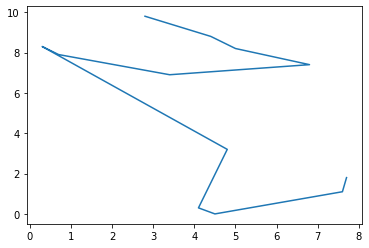

In [21]:
# some visual plotting code, just for fun

import matplotlib.pyplot
matplotlib.pyplot.plot(*zip(*path))
